### Outliers

Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

Unfortunately, there are no strict statistical rules for definitively identifying outliers. Finding outliers depends on subject-area knowledge and an understanding of the data collection process. While there is no solid mathematical definition, there are guidelines and statistical tests you can use to find outlier candidates.

### Outliers and Their Impact

Outliers are a simple concept—they are values that are notably different from other data points, and they can cause problems in statistical procedures.

To demonstrate how much a single outlier can affect the results, let’s examine the properties of an example dataset. It contains 15 height measurements of human males. One of those values is an outlier. The table below shows the mean height and standard deviation with and without the outlier.

### 5 Ways to Find Outliers in Your Data

    1. Sorting Your Datasheet to Find Outliers

    2. Graphing Your Data to Identify Outliers

    3. Using Z-scores to Detect Outliers

    4. Using the Interquartile Range to Create Outlier Fences

    5. Finding Outliers with Hypothesis Tests

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### 1. Sorting Your Datasheet to Find Outliers

In [4]:
df['sepal_width'].sort_values()

60     2.0
62     2.2
119    2.2
68     2.2
41     2.3
      ... 
16     3.9
14     4.0
32     4.1
33     4.2
15     4.4
Name: sepal_width, Length: 150, dtype: float64

In [5]:
df['sepal_width'].min()

2.0

In [6]:
df['sepal_width'].max()

4.4

### 2. Graphing Your Data to Identify Outliers

Graphs to understand Outliers
                    
        1. distributions (hist and kde combine)
                    
        2. Box Plot
                    
        3. Violin Plot
                    
        4. Boxen Plot
        
        5. Scatter Plot

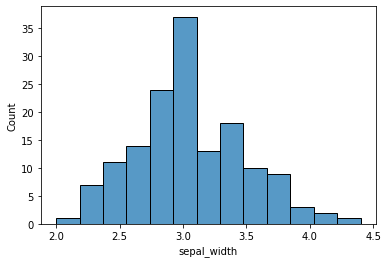

In [7]:
sns.histplot(data=df,x='sepal_width')
plt.show()

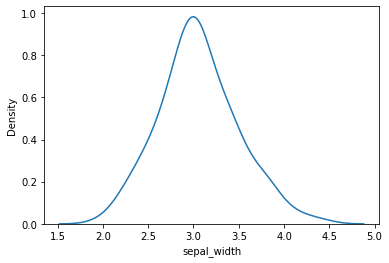

In [8]:
sns.kdeplot(data=df,x='sepal_width')
plt.show()

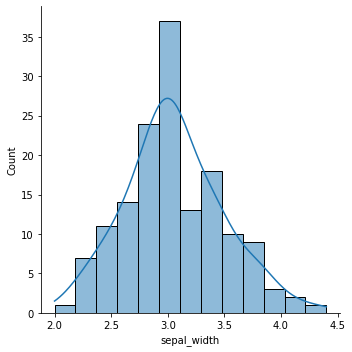

In [9]:
sns.displot(data=df,x='sepal_width',kde=True)
plt.show()

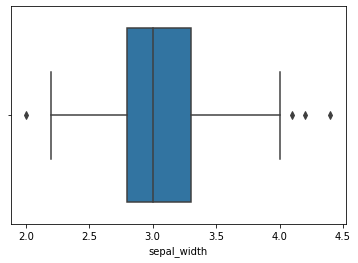

In [10]:
sns.boxplot(data=df,x='sepal_width')
plt.show()

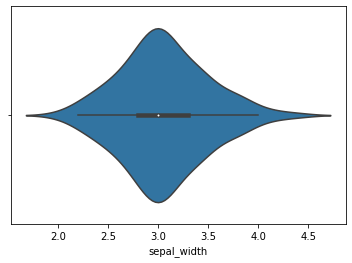

In [11]:
sns.violinplot(data=df,x='sepal_width')
plt.show()

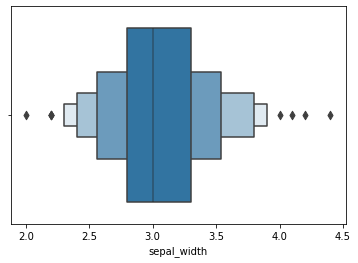

In [12]:
sns.boxenplot(data=df,x='sepal_width')
plt.show()

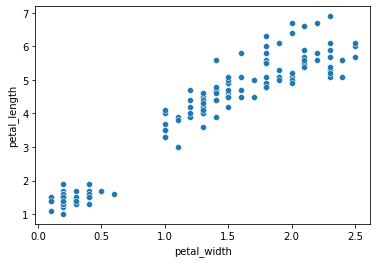

In [13]:
sns.scatterplot(data=df,x='petal_width',y='petal_length')
plt.show()

### 3. Using Z-scores to Detect Outliers

Z-scores can quantify the unusualness of an observation when your data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls. For example, a Z-score of 2 indicates that an observation is two standard deviations above the average while a Z-score of -2 signifies it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.

To calculate the Z-score for an observation, take the raw measurement, subtract the mean, and divide by the standard deviation. Mathematically, the formula for that process is the following:

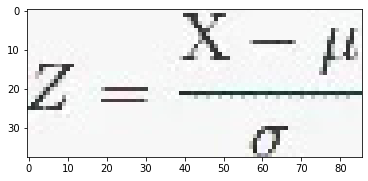

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Read Images
img = mpimg.imread(r"zscore.jpg")
# Output Images
plt.imshow(img)
plt.show()

The further away an observation’s Z-score is from zero, the more unusual it is. 

A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero. The probability distribution below displays the distribution of Z-scores in a standard normal distribution. 

##### Note:

Z-scores beyond +/- 3 are so extreme you can barely see the shading under the curve.

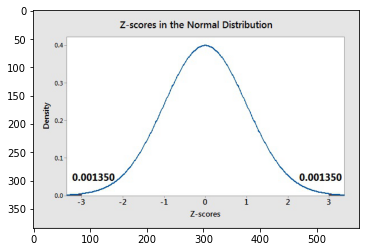

In [15]:
# Read Images
img = mpimg.imread(r"zscores.jpg")
# Output Images
plt.imshow(img)
plt.show()

In [16]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zscore)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [17]:
numeric_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [18]:
cols = list(numeric_cols)
df[cols]
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004,-1.340227,-1.315444
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979,-1.340227,-1.315444
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414,-1.397064,-1.315444
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217,-1.283389,-1.315444
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201,-1.340227,-1.315444


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing Concepts

Outliers => We can check only on numerical data -> Continuos Data

Outliers means extreme values

    -> To find the outliers we are using
    
        -> Z score (Don't use)
                    
        -> IQR => Inter Quartile Range (Very import)
                    
        -> Skewness and Kurtosis
                    
        -> by using mean and median values
                    
                    
    -> Best way to findout the outlier values is IQR
                    
        -> Q1 => .quantile(0.25)
                    
        -> Q2 => .quantile(0.5)
                
        -> Q3 => .quantile(0.75)
                    
        -> IQR => Q3 - Q1  => This is the perfect data
                    
        -> LWP => Lower Whisker Point
                    
            -> Formula:
                    
                -> LWP = Q1 - (1.5 * IQR)
                    
                -> LWP = Q1 - (3 * IQR)   => Threshold to check the lower limit point
                    
        -> UWP => Upper Whisker point
              
                -> UWP = Q3 + (1.5 * IQR)
                    
                -> UWP = Q3 + (3 * IQR)   => Threshold to check the Upper limit point
                    
                    
        -> In every data we are going to have extreme values. But we need to find those exrtreme values effecting data or not
                    
        -> The values which below to LWP and Above to UWP we going to call those values as outliers
                                        

In [20]:
def outliers(data,col):
    mini = data[col].min()
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.5)
    Q3 = data[col].quantile(0.75)
    maxi = data[col].max()
    IQR = round((Q3 - Q1),2)
    LLP = round((Q1 - (1.5*IQR)),2)
    ULP = round((Q3 + (1.5*IQR)),2)
    LLP_L = len(data[data[col]<LLP])
    ULP_L = len(data[data[col]>ULP])
    
    print('\nColumn Name:',col)
    
    sns.boxplot(data=data,x=col)
    plt.show()
    
    print('Minimum Value in',col,':',mini)
    print('Maximum Value in',col,':',maxi)
    print('Q1 Value in',col,':',Q1)
    print('Q2 Value in',col,':',Q2)
    print('Q3 Value in',col,':',Q3)
    print('IQR Value in',col,':',IQR)
    print('LLP Value in',col,':',LLP)
    print('ULP Value in',col,':',ULP)
    print('Number of outliers below LLP:',LLP_L)
    print('Number of outliers above ULP:',ULP_L)


In [21]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Column Name: sepal_length


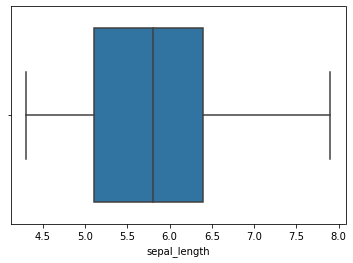

Minimum Value in sepal_length : 4.3
Maximum Value in sepal_length : 7.9
Q1 Value in sepal_length : 5.1
Q2 Value in sepal_length : 5.8
Q3 Value in sepal_length : 6.4
IQR Value in sepal_length : 1.3
LLP Value in sepal_length : 3.15
ULP Value in sepal_length : 8.35
Number of outliers below LLP: 0
Number of outliers above ULP: 0

Column Name: sepal_width


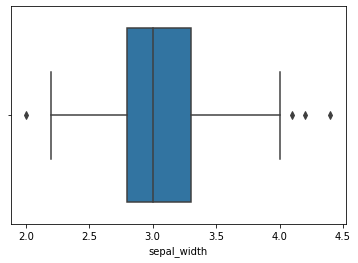

Minimum Value in sepal_width : 2.0
Maximum Value in sepal_width : 4.4
Q1 Value in sepal_width : 2.8
Q2 Value in sepal_width : 3.0
Q3 Value in sepal_width : 3.3
IQR Value in sepal_width : 0.5
LLP Value in sepal_width : 2.05
ULP Value in sepal_width : 4.05
Number of outliers below LLP: 1
Number of outliers above ULP: 3

Column Name: petal_length


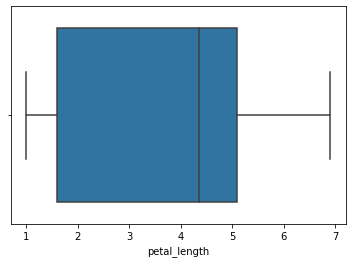

Minimum Value in petal_length : 1.0
Maximum Value in petal_length : 6.9
Q1 Value in petal_length : 1.6
Q2 Value in petal_length : 4.35
Q3 Value in petal_length : 5.1
IQR Value in petal_length : 3.5
LLP Value in petal_length : -3.65
ULP Value in petal_length : 10.35
Number of outliers below LLP: 0
Number of outliers above ULP: 0

Column Name: petal_width


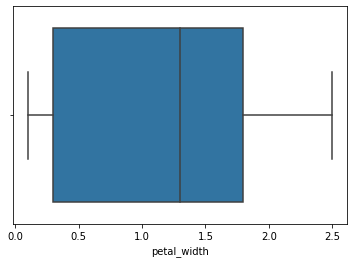

Minimum Value in petal_width : 0.1
Maximum Value in petal_width : 2.5
Q1 Value in petal_width : 0.3
Q2 Value in petal_width : 1.3
Q3 Value in petal_width : 1.8
IQR Value in petal_width : 1.5
LLP Value in petal_width : -1.95
ULP Value in petal_width : 4.05
Number of outliers below LLP: 0
Number of outliers above ULP: 0


In [22]:
for i in columns:
    outliers(df,i)

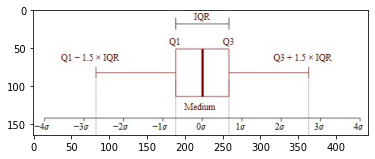

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Read Images
img = mpimg.imread(r"C:\Users\divesh\Divesh Classes\Class_7PM\iqr.jpg")
# Output Images
plt.imshow(img)
plt.show()